In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

In [36]:
df = pd.read_csv("C:\\Users\\saurav\\Downloads\\GlobalLandTemperaturesByCity.csv")

In [37]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [39]:
df = df.dropna()
df_denmark = df[df.Country == 'Denmark']

In [40]:
df_denmark.index = pd.to_datetime(df_denmark.dt)

In [41]:
df_denmark = df_denmark.drop(['dt', 'AverageTemperatureUncertainty'], axis = 1)

In [42]:
df.shape

(8235082, 7)

In [43]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [44]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [45]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


array([[<AxesSubplot:title={'center':'AverageTemperature'}>,
        <AxesSubplot:title={'center':'AverageTemperatureUncertainty'}>]],
      dtype=object)

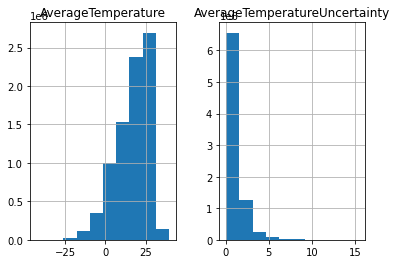

In [47]:
df.hist()

In [49]:
df_denmark.head()

,AverageTemperature,City,Country,Latitude,Longitude
dt,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,Århus,Denmark,57.05N,10.33E


In [50]:
ts = df_denmark.AverageTemperature

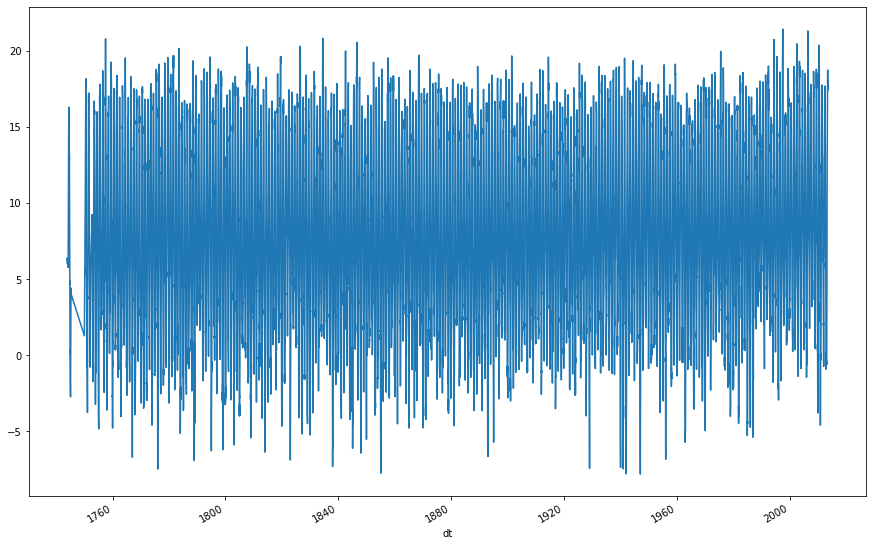

In [55]:
plt.figure(figsize = (15,10))
ts.plot()
plt.show()

## perform Dickey-fuller Test

In [57]:
adifuller_result = adfuller(ts, autolag = 'AIC')

In [58]:
print(f'ADF statistic {adifuller_result[0]}, \n p-value: {adifuller_result[1]}')
for value, keys in adifuller_result[4].items():
    print('critical values:')
    print(f' {value}, {keys}')

ADF statistic -14.764430391800646, 
 p-value: 2.374697045635644e-27
critical values:
 1%, -3.430868192869495
critical values:
 5%, -2.86176901566292
critical values:
 10%, -2.566891900059256


## Build first Arma model

In [63]:
arma_model = ARMA(ts, order= (1,1))
arma_model.fit()
arma_prid = arma_model.predict('01/01/1990', '01/01/1991')

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

ValueError: could not convert string to float: '01/01/1990'

In [61]:
arma_model.fit()

In [62]:
arma_prid = arma_model.predict('01/01/1990', '01/01/1991')

ValueError: could not convert string to float: '01/01/1990'

In [20]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [26]:
arma_prid.param

AttributeError: 'numpy.ndarray' object has no attribute 'param'

In [22]:
arma_prid = arma_model.predict(ts)

In [23]:
from sklearn.metrics import mean_absolute_error

In [25]:
mse = mean_absolute_error(arma_model, arma_prid)

TypeError: Expected sequence or array-like, got <class 'statsmodels.tsa.arima_model.ARMA'>